# Credit Risk Evaluator

In [29]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
# Machine Learning Libs

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [31]:
# Import the data
df = pd.read_csv("Resources/lending_data.csv")
# df = pd.read_csv("lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


                  loan_size  interest_rate  borrower_income  debt_to_income  \
loan_size          1.000000       0.999905         0.999893        0.951847   
interest_rate      0.999905       1.000000         0.999994        0.951938   
borrower_income    0.999893       0.999994         1.000000        0.951950   
debt_to_income     0.951847       0.951938         0.951950        1.000000   
num_of_accounts    0.988507       0.988515         0.988509        0.941078   
derogatory_marks   0.840407       0.840596         0.840577        0.825668   
total_debt         0.999893       0.999994         1.000000        0.951950   
loan_status        0.758846       0.758900         0.758890        0.589305   

                  num_of_accounts  derogatory_marks  total_debt  loan_status  
loan_size                0.988507          0.840407    0.999893     0.758846  
interest_rate            0.988515          0.840596    0.999994     0.758900  
borrower_income          0.988509          0.840577

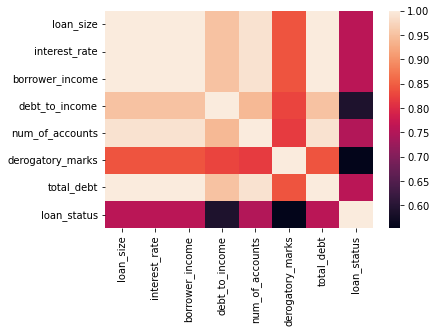

In [33]:
# check correlations
corrs = df.corr()
print(corrs)
print()
sns.heatmap(corrs)
plt.show()

In [34]:
abs(df.corr()["loan_status"]).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.



## Split the Data into Training and Testing Sets

In [41]:
features = ["interest_rate", "borrower_income", "total_debt", "loan_size", "num_of_accounts", "debt_to_income", "derogatory_marks"]
X = df.loc[:, features].values
y = df.loc[:, ["loan_status"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.7 : 0.3


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [42]:
# # init the model


def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[52247   278]
 [  184  1566]]

                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52525
           1       0.85      0.89      0.87      1750

    accuracy                           0.99     54275
   macro avg       0.92      0.94      0.93     54275
weighted avg       0.99      0.99      0.99     54275

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[22411   100]
 [   58   692]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.92      0.90       750

    accuracy                           0.99     23261
   macro avg       0.94      0.96      0.95     23261
weighted avg       0.99      0.99      0.99     23261

    

AUC for the Model Test Set: 0.9968795107577036


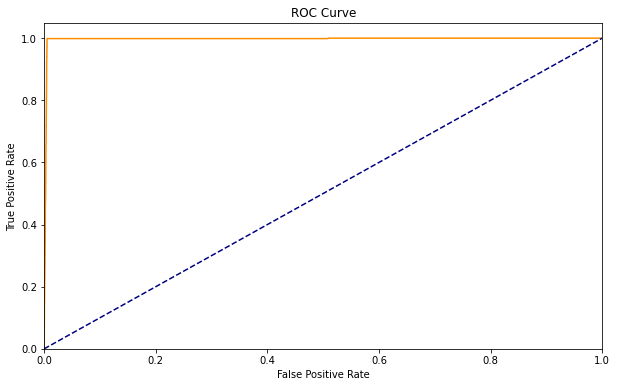

Brier Score:
132.40735746449184


In [43]:
# Train a Logistic Regression model and print the model score
lr = LogisticRegression(max_iter=10000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[52407   118]
 [   31  1719]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     52525
           1       0.94      0.98      0.96      1750

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[22413    98]
 [   76   674]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.90      0.89       750

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261

    

AUC for the Model Test Set: 0.9969602712747843


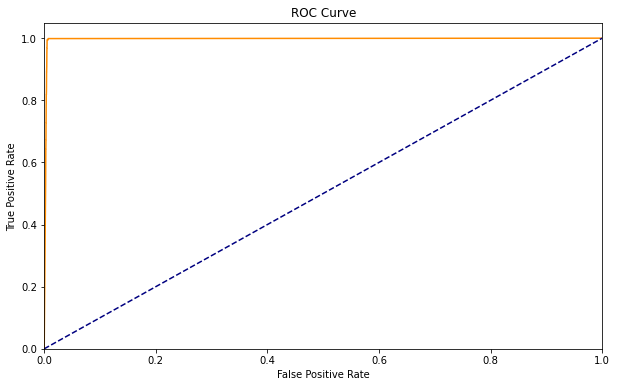

Brier Score:
137.31357888574607


In [44]:
# Train a Random Forest Classifier model and print the model score
rf = RandomForestClassifier(random_state=42, n_estimators=60)

evaluateModel(rf, X_train, X_test, y_train, y_test)


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*